# Before your start:
- Read the README.md file
- Happy learning!

In [52]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [53]:
# loading the data: Retail Sales data

sales = pd.read_csv('sales.csv')
real_sales = pd.read_csv('REAL_DATA.csv')

In [54]:
print(sales.head())
print(real_sales.head())

   Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  open  \
0      425390       366            4  2013-04-18                  517     1   
1      291687       394            6  2015-04-11                  694     1   
2      411278       807            4  2013-08-29                  970     1   
3      664714       802            2  2013-05-28                  473     1   
4      540835       726            4  2013-10-10                 1068     1   

   promotion state_holiday  school_holiday  sales  
0          0             0               0   4422  
1          0             0               0   8297  
2          1             0               0   9729  
3          1             0               0   6513  
4          1             0               0  10882  
    index  store_ID  day_of_week        date  nb_customers_on_day  open  \
0  272371       415            7  01/03/2015                    0     0   
1  558468        27            7  29/12/2013                   

In [55]:
#there are no missing data
print("\nMissing data:")
print(sales.isnull().sum())
print("\n:")
print(real_sales.isnull().sum()) #IF THERE ARE NULL VALUES IN THE REAL DATASET, WE NEED TO EXTRACT AND GO BACK TO CUSTOMERS AS ERRORS!

print("\n:")
print(sales.columns)
print("\n:")
print(real_sales.columns)

#Drop the first column as this seems to be from Indexing and doesn't make sense
sales = sales.drop(columns=["Unnamed: 0"])
real_sales = real_sales.drop(columns = ['index'])


Missing data:
Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

:
index                  0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
dtype: int64

:
Index(['Unnamed: 0', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

:
Index(['index', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday'],
      dtype='object')


In [56]:
print(sales.dtypes)
print(real_sales.dtypes)

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object


                     store_ID  day_of_week  nb_customers_on_day      open  \
store_ID             1.000000     0.000329             0.023605 -0.001108   
day_of_week          0.000329     1.000000            -0.385616 -0.527947   
nb_customers_on_day  0.023605    -0.385616             1.000000  0.617264   
open                -0.001108    -0.527947             0.617264  1.000000   
promotion           -0.000364    -0.392736             0.315858  0.294936   
school_holiday      -0.000706    -0.206069             0.071085  0.085213   

                     promotion  school_holiday  
store_ID             -0.000364       -0.000706  
day_of_week          -0.392736       -0.206069  
nb_customers_on_day   0.315858        0.071085  
open                  0.294936        0.085213  
promotion             1.000000        0.066565  
school_holiday        0.066565        1.000000  


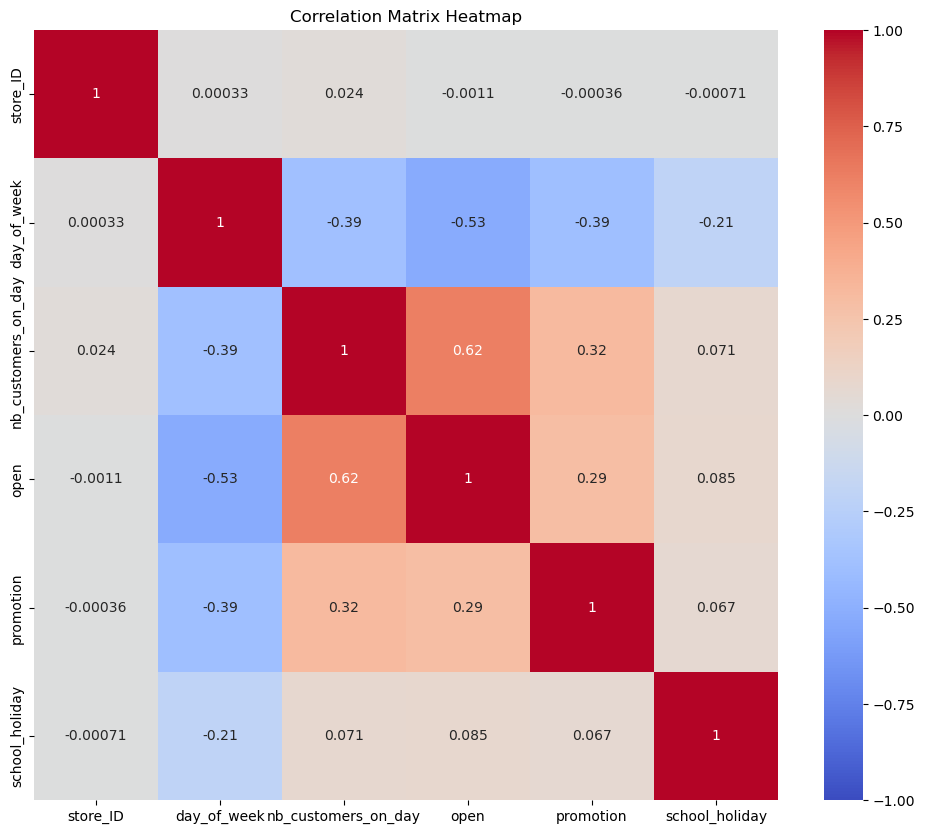

In [57]:
# Create the correlation matrix on Training dataset

# Select only numeric columns and drop the target 'Sales'

sales_without_sales = sales.drop('sales', axis=1)

numeric_columns = sales_without_sales.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

#Create the Heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [58]:
# NOTE HIGH CORRELATION BETWEEN PROMOTION AND NB_CUSTOMERS_ON_DAY, 
# I could create additional feature called - sales['promo_customers_interaction'] = sales['promotion'] * sales['nb_customers_on_day'] as 'FEATURE ENGINEERING' but XGBOOST takes care of it!

sales['promo_customers_interaction'] = sales['promotion'] * sales['nb_customers_on_day']
real_sales['promo_customers_interaction'] = real_sales['promotion'] * real_sales['nb_customers_on_day']

print(sales.head())
print(real_sales.head())

   store_ID  day_of_week        date  nb_customers_on_day  open  promotion  \
0       366            4  2013-04-18                  517     1          0   
1       394            6  2015-04-11                  694     1          0   
2       807            4  2013-08-29                  970     1          1   
3       802            2  2013-05-28                  473     1          1   
4       726            4  2013-10-10                 1068     1          1   

  state_holiday  school_holiday  sales  promo_customers_interaction  
0             0               0   4422                            0  
1             0               0   8297                            0  
2             0               0   9729                          970  
3             0               0   6513                          473  
4             0               0  10882                         1068  
   store_ID  day_of_week        date  nb_customers_on_day  open  promotion  \
0       415            7  01/03/2

In [59]:
# DATA TRANSFORMATION STEPS:

# Step 1 Missing value problem - Have NONE

In [60]:
# Step 2 - CONVERT Catagorical data to Numerical value

import pandas as pd

# 'state_holiday' is an object contains value of 0,a,b,c convert these into Numerical value using One-Hot Encoding. 

sales = pd.get_dummies(sales, columns=['state_holiday'], drop_first=True)
real_sales = pd.get_dummies(real_sales, columns=['state_holiday'], drop_first=True)

In [61]:
# convert Catagorical data to Numerical value. Convert the 'date' feature

# Function to convert date to datetime and extract features
def process_dates(df):
    # Check the format of the date
    if '/' in df['date'].iloc[0]:  # Check if it contains '/'
        try:
            # Try converting assuming dd/mm/yyyy format
            df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
        except ValueError:
            # If it fails, assume it’s in yyyy/mm/dd format
            df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
    else:
        # Assume default format if no '/' (for future-proofing)
        df['date'] = pd.to_datetime(df['date'])

    # Extract features from the date
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    # Drop the original date column 
    df = df.drop('date', axis=1)
    
    return df

# Process training set
sales = process_dates(sales)

# Process test set
real_sales = process_dates(real_sales)

print(sales.dtypes)
print("\n:")
print(real_sales.dtypes)

store_ID                       int64
day_of_week                    int64
nb_customers_on_day            int64
open                           int64
promotion                      int64
school_holiday                 int64
sales                          int64
promo_customers_interaction    int64
state_holiday_a                 bool
state_holiday_b                 bool
state_holiday_c                 bool
year                           int32
month                          int32
day                            int32
dtype: object

:
store_ID                       int64
day_of_week                    int64
nb_customers_on_day            int64
open                           int64
promotion                      int64
school_holiday                 int64
promo_customers_interaction    int64
state_holiday_a                 bool
state_holiday_b                 bool
state_holiday_c                 bool
year                           int32
month                          int32
day                  

In [62]:
# DATA PRE-PROCESSING STEPS:

# STEP 1: Standardization using StandardScaler - Feature Scaling!!! to standardize diff ranges of features

from sklearn.preprocessing import StandardScaler

# Split the input between features and target and apply Scaling to the features

X = sales.drop('sales', axis=1)
y = sales['sales']

X_train_scaled = StandardScaler().fit_transform(X)
X_real_scaled = StandardScaler().fit_transform(real_sales)
X_real_scaled


array([[-4.47843426e-01,  1.50139519e+00, -1.35707018e+00, ...,
         1.49904608e+00, -8.56760080e-01, -1.66660046e+00],
       [-1.65252605e+00,  1.50139519e+00, -1.35707018e+00, ...,
        -1.07392189e+00,  1.85304770e+00,  1.51156422e+00],
       [-4.81996800e-01, -5.01102516e-01,  5.05358709e-02, ...,
         2.12562096e-01, -8.56760080e-01,  3.76505409e-01],
       ...,
       [-1.68978428e+00, -5.01102516e-01,  3.12535962e-02, ...,
         2.12562096e-01,  4.65091805e-02, -5.31541643e-01],
       [ 1.21325246e+00, -1.00172694e+00, -1.58808531e-02, ...,
        -1.07392189e+00, -5.55670326e-01,  8.30528935e-01],
       [ 1.15736512e+00, -4.78090877e-04,  4.16899091e-01, ...,
        -1.07392189e+00,  1.55195795e+00,  6.03517172e-01]])

In [63]:
print(X_train_scaled.shape)
print(X_real_scaled.shape)

(640840, 13)
(71205, 13)


In [64]:
# AI MODEL 1: XGBoost. 

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Assuming you have your features in X and target in y
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.15, random_state=42)

# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)                # TRAINING DATA Prediction
y_pred_real = xgb_reg.predict(X_real_scaled)    # REAL DATA Prediction


# Creating the CSV file to deliver
real_sales_final = real_sales
real_sales_final['sales'] = pd.DataFrame(y_pred_real, columns=['sales']).astype('int64')
real_sales_final.to_csv('G5_v2.csv', index=False)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 958910.257063057
R² Score: 0.9353342204489773


In [65]:
""" # FEATURE PERFORMANCE analysis after Training the model.

#! pip install xgboost

import xgboost # Import XGBoost

#X = sales._get_numeric_data().drop('sales', axis=1)
#y = sales['sales']

xgb = xgboost.XGBRegressor()  # Initialize the XGBoost Regressor
xgb.fit(X,y) """

" # FEATURE PERFORMANCE analysis after Training the model.\n\n#! pip install xgboost\n\nimport xgboost # Import XGBoost\n\n#X = sales._get_numeric_data().drop('sales', axis=1)\n#y = sales['sales']\n\nxgb = xgboost.XGBRegressor()  # Initialize the XGBoost Regressor\nxgb.fit(X,y) "

In [66]:
""" sort_idx = xgb.feature_importances_.argsort()   #feature importance sort

plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])    #plotting feature importance
plt.show(); """

' sort_idx = xgb.feature_importances_.argsort()   #feature importance sort\n\nplt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])    #plotting feature importance\nplt.show(); '

In [67]:
""" # COMMENT: After running the model, removing these 2 features reduces the Training set performance R2

# Based on feature performance ABOVE, remove feature that are not of high importance and run the model again.
#removing features that have little to no impact on the target variable can help improve the model's performance. 

# nb_customers_open_interaction and school_holiday are not contributing significantly, I am going to drop these from my model.

sales = sales.drop(columns=["school_holiday", 'nb_customers_open_interaction'])
print(sales.dtypes)
print(sales.shape) """

' # COMMENT: After running the model, removing these 2 features reduces the Training set performance R2\n\n# Based on feature performance ABOVE, remove feature that are not of high importance and run the model again.\n#removing features that have little to no impact on the target variable can help improve the model\'s performance. \n\n# nb_customers_open_interaction and school_holiday are not contributing significantly, I am going to drop these from my model.\n\nsales = sales.drop(columns=["school_holiday", \'nb_customers_open_interaction\'])\nprint(sales.dtypes)\nprint(sales.shape) '

In [68]:
# Perform Cross validation on the model to know it generalizes well and with small standard deviation, it indicates consistent performance
# 5 FOLD cross validation

from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

# Initialize the XGBoost Regressor with the same parameters used before
xgb_reg = XGBRegressor(
    n_estimators=100,    # number of boosting rounds
    learning_rate=0.1,   # step size shrinkage
    max_depth=6,         # maximum depth of trees
    subsample=0.8,       # fraction of samples to be used for fitting the trees
    colsample_bytree=0.8 # fraction of features to be used for fitting the trees
)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(xgb_reg, X_train_scaled, y, cv=5, scoring='r2')

# Calculate mean and standard deviation of R² scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Average R² Score: {mean_cv_score:.4f}')
print(f'Standard Deviation of R² Score: {std_cv_score:.4f}')

Cross-Validation R² Scores: [0.91253839 0.91477639 0.9121188  0.91273696 0.91322996]
Average R² Score: 0.9131
Standard Deviation of R² Score: 0.0009


In [ ]:
""" # Creating the CSV file to deliver
real_sales_df_final = real_sales
real_sales_df_final['sales'] = pd.DataFrame(y_pred_real_scaled, columns=['sales']).astype('int64')
real_sales_df_final.to_csv('G5.csv', index=False) """

In [73]:
# MODEL 2: RandomForest model with K-fold validation, KFOLD split = 3

from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

#rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt')


kf = KFold(n_splits=3, shuffle=True, random_state=42)  # I can adjust n_splits based on needs (keeping it to 3 so it can run faster)

r2_scores = []
mse_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_train_scaled[train_index], X_train_scaled[test_index] # This is scaled numpy array
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]     # This is DF 
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred))
   #mse_scores.append(mean_squared_error(y_test, y_pred))
    
print(f"R2 Scores: {r2_scores}")
#print(f"Mean Squared Error Scores: {mse_scores}")
print(f"Average R2 Score: {sum(r2_scores)/len(r2_scores)}")
#print(f"Average Mean Squared Error: {sum(mse_scores)/len(mse_scores)}")

R2 Scores: [0.8719360343641072, 0.8753091802705868, 0.8708503567222661]
Average R2 Score: 0.8726985237856534


In [69]:
# Cross check with LightGBM model

#!pip install lightgbm

In [72]:
# MODEL 3 - LightGBM Model

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your features in X and target in y
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.15, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',  # root mean squared error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum tree leaves for base learners
    'learning_rate': 0.05,
    'feature_fraction': 0.9,  # Use 90% of features for training
}

# Train the model without early stopping
num_round = 100  # Number of boosting rounds
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data])

# Make predictions
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 544714, number of used features: 13
[LightGBM] [Info] Start training from score 5778.633237
R² Score: 0.9046179993438888
